In [1]:
# This file plays the mpc motion only in viz
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import pinocchio as pin
from matplotlib import pyplot as plt

from robot_properties_solo.config import Solo12Config

from py_biconvex_mpc.bullet_utils.solo_mpc_env import Solo12Env

from abstract_acyclic_gen import SoloAcyclicGen
# from plan_cartwheel import plan

pybullet build time: Jul  2 2021 21:43:18


In [2]:
robot = Solo12Config.buildRobotWrapper()
rmodel = robot.model
rdata = robot.data

viz = pin.visualize.MeshcatVisualizer(robot.model, robot.collision_model, robot.visual_model)
viz.initViewer(open=False)
viz.loadViewerModel()

pin_robot = Solo12Config.buildRobotWrapper()
pin_robot = Solo12Config.buildRobotWrapper()
urdf = Solo12Config.urdf_path


q0 = np.array(Solo12Config.initial_configuration)
v0 = pin.utils.zero(pin_robot.model.nv)
x0 = np.concatenate([q0, pin.utils.zero(pin_robot.model.nv)])

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7001/static/


In [3]:
viz.viewer.jupyter_cell()

In [4]:
from plan_hifive import plan

sim_t = 0.0
sim_dt = .001
index = 0
pln_ctr = 0
plan_freq = 1.0 # sec
update_time = 0.0 # sec (time of lag)
lag = int(update_time/sim_dt)

mg = SoloAcyclicGen(pin_robot, urdf, plan_freq)
mg.update_motion_params(plan, sim_t)

q = q0
v = v0

for o in range(1):
    contact_configuration = np.array([1,1,1,1])
    xs, us, f = mg.optimize(q, v, sim_t)
    xs = xs[lag:]
    us = us[lag:]
    f = f[lag:]

    time.sleep(0.001)
    for ind in range(int(plan_freq/sim_dt)):
        viz.display(xs[ind][:robot.model.nq])

    q = xs[int(plan_freq/sim_dt)-1][0:pin_robot.model.nq]
    v = xs[int(plan_freq/sim_dt)-1][pin_robot.model.nq:]

    sim_t += plan_freq

Initialized Kino-Dyn planner
Maximum iterations reached 
Final norm: 0.405988
Cost Time : 0.00862884521484375
Solve Time :  0.7375931739807129


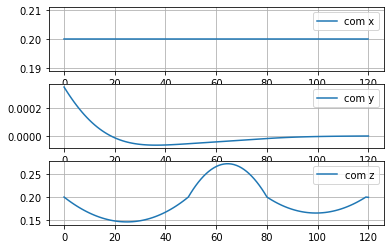

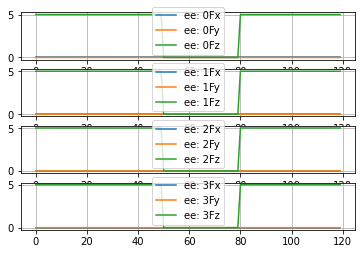

In [5]:
mg.plot()